# Imports

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from datetime import datetime
import seaborn as sns

# Load match results

In [2]:
%pwd

'/Users/calebcastleberry/Documents/GitHub/OWL/ELO Analysis'

In [3]:
%cd '/Users/calebcastleberry/Documents/Github/OWL/Data'

/Users/calebcastleberry/Documents/GitHub/OWL/Data


In [4]:
map_results = pd.read_csv('Match Summary Data.csv', index_col=0)

In [5]:
map_results = map_results.sort_values(by=['Date', 'Map Number'],ascending=True).reset_index(drop=True)
map_results.head(12)

,Date,Map Name,Map Number,Map Type,Match Id,Team A,Team B,Winner
0,2018-01-11,Dorado,1,Escort,2381,LDN,FLA,Team B
1,2018-01-11,Junkertown,1,Escort,2380,DAL,SEO,Team A
2,2018-01-11,Dorado,1,Escort,2379,SHD,GLA,Team B
3,2018-01-11,Dorado,1,Escort,2375,SFS,VAL,Team B
4,2018-01-11,Temple of Anubis,2,Assault,2381,LDN,FLA,Team A
5,2018-01-11,Temple of Anubis,2,Assault,2380,DAL,SEO,Team B
6,2018-01-11,Temple of Anubis,2,Assault,2379,SHD,GLA,Team B
7,2018-01-11,Temple of Anubis,2,Assault,2375,SFS,VAL,Team B
8,2018-01-11,Oasis,3,KOTH,2381,LDN,FLA,Team A
9,2018-01-11,Ilios,3,KOTH,2380,DAL,SEO,Team B


In [6]:
map_results[(map_results["Team A"]=='GLA') | (map_results["Team B"]=='GLA')]

,Date,Map Name,Map Number,Map Type,Match Id,Team A,Team B,Winner
2,2018-01-11,Dorado,1,Escort,2379,SHD,GLA,Team B
6,2018-01-11,Temple of Anubis,2,Assault,2379,SHD,GLA,Team B
10,2018-01-11,Ilios,3,KOTH,2379,SHD,GLA,Team B
14,2018-01-11,Eichenwalde,4,Hybrid,2379,SHD,GLA,Team B
25,2018-01-13,Junkertown,1,Escort,2404,SEO,GLA,Team A
31,2018-01-13,Horizon Lunar Colony,2,Assault,2404,SEO,GLA,Team A
37,2018-01-13,Ilios,3,KOTH,2404,SEO,GLA,Team A
43,2018-01-13,Numbani,4,Hybrid,2404,SEO,GLA,Team A
65,2018-01-19,Junkertown,1,Escort,2410,PHI,GLA,Team A
67,2018-01-19,Temple of Anubis,2,Assault,2410,PHI,GLA,Team A


# Create ELO Dataframe

In [7]:
team_list = list(map_results["Team A"].unique())
team_elo_start = []

In [8]:
for team in team_list:
    team_elo = {
        "date": datetime.strptime('2018-1-1', '%Y-%m-%d'),
        "team": team, 
        "elo": 1000,
        "map number": 0
    }
    team_elo_start.append(team_elo)

In [9]:
team_elo_start

[{'date': datetime.datetime(2018, 1, 1, 0, 0),
  'elo': 1000,
  'map number': 0,
  'team': 'LDN'},
 {'date': datetime.datetime(2018, 1, 1, 0, 0),
  'elo': 1000,
  'map number': 0,
  'team': 'DAL'},
 {'date': datetime.datetime(2018, 1, 1, 0, 0),
  'elo': 1000,
  'map number': 0,
  'team': 'SHD'},
 {'date': datetime.datetime(2018, 1, 1, 0, 0),
  'elo': 1000,
  'map number': 0,
  'team': 'SFS'},
 {'date': datetime.datetime(2018, 1, 1, 0, 0),
  'elo': 1000,
  'map number': 0,
  'team': 'BOS'},
 {'date': datetime.datetime(2018, 1, 1, 0, 0),
  'elo': 1000,
  'map number': 0,
  'team': 'PHI'},
 {'date': datetime.datetime(2018, 1, 1, 0, 0),
  'elo': 1000,
  'map number': 0,
  'team': 'SEO'},
 {'date': datetime.datetime(2018, 1, 1, 0, 0),
  'elo': 1000,
  'map number': 0,
  'team': 'NYE'},
 {'date': datetime.datetime(2018, 1, 1, 0, 0),
  'elo': 1000,
  'map number': 0,
  'team': 'FLA'},
 {'date': datetime.datetime(2018, 1, 1, 0, 0),
  'elo': 1000,
  'map number': 0,
  'team': 'VAL'},
 {'date': 

In [10]:
elo_df = pd.DataFrame(team_elo_start)

In [11]:
elo_df.head(12)

,date,elo,map number,team
0,2018-01-01,1000,0,LDN
1,2018-01-01,1000,0,DAL
2,2018-01-01,1000,0,SHD
3,2018-01-01,1000,0,SFS
4,2018-01-01,1000,0,BOS
5,2018-01-01,1000,0,PHI
6,2018-01-01,1000,0,SEO
7,2018-01-01,1000,0,NYE
8,2018-01-01,1000,0,FLA
9,2018-01-01,1000,0,VAL


# Elo Function

In [12]:
test_elo_a = 1200
test_elo_b = 1100

In [13]:
def elo_probabilities(elo_a, elo_b):
    q_a = 10**(elo_a/400)
    q_b = 10**(elo_b/400)
    e_a = q_a / (q_a + q_b)
    e_b = q_b / (q_a + q_b)
    return e_a, e_b

def update_elo(elo_a, elo_b, a_win, K=20):
    q_a = 10**(elo_a/400)
    q_b = 10**(elo_b/400)
    e_a = q_a / (q_a + q_b)
    e_b = q_b / (q_a + q_b)
    
    
    r_a = elo_a + K * (a_win - e_a)
    r_b = elo_b + K * ((1-a_win) - e_b)
    return r_a, r_b

In [14]:
elo_probabilities(test_elo_a, test_elo_b)

(0.6400649998028851, 0.35993500019711494)

In [15]:
update_elo(test_elo_a, test_elo_b, 1)

(1207.1987000039423, 1092.8012999960577)

In [16]:
update_elo(test_elo_a, test_elo_b, 0)

(1187.1987000039423, 1112.8012999960577)

## Get current elo

In [17]:
def get_current_elo(df, team, date):
    df = df[(df["team"]== team) & (df['date'] <= date) ]
    df = df.sort_values(by=['date', 'map number'], ascending=False).reset_index(drop=True)
    elo = df.iloc[0]['elo']
    return elo

def get_current_map_number(df, team, date):
    df = df[(df["team"]== team) & (df['date'] <= date) ]
    df = df.sort_values(by='map number', ascending=False).reset_index(drop=True)
    elo = df.iloc[0]['map number']
    return elo

In [18]:
print(get_current_elo(elo_df, 'SEO', datetime.strptime('2018-1-2', '%Y-%m-%d')))
get_current_map_number(elo_df, "SEO", datetime.strptime('2018-1-2', '%Y-%m-%d'))

1000


0

# Loop through map result frame and update elo

In [19]:
current_map =  map_results.iloc[0]
current_map

Date          2018-01-11
Map Name          Dorado
Map Number             1
Map Type          Escort
Match Id            2381
Team A               LDN
Team B               FLA
Winner            Team B
Name: 0, dtype: object

In [20]:
map_results.shape[0]

154

In [21]:
for i in range(map_results.shape[0]):
    current_map = map_results.iloc[i]
    map_name = current_map['Map Name']
    team_a = current_map['Team A']
    team_b = current_map['Team B']
    match_date = datetime.strptime(current_map['Date'], '%Y-%m-%d')
    winner = current_map['Winner']
    if winner=='Team A':
        a_win = 1
    elif winner=='Team B':
        a_win = 0
    else:
        a_win = 0.5
        
    a_elo = get_current_elo(elo_df, team_a, match_date)
    b_elo = get_current_elo(elo_df, team_b, match_date)
    a_map = get_current_map_number(elo_df, team_a, match_date) + 1
    b_map = get_current_map_number(elo_df, team_b, match_date) + 1
    new_a_row = {
        'date': match_date,
        'team': team_a,
        'map number': a_map
    }
    new_b_row = {
        'date': match_date,
        'team': team_b,
        'map number': b_map
    }
    new_a_row['elo'], new_b_row['elo'] = update_elo(a_elo, b_elo, a_win=a_win, K=30)
    temp_df = pd.DataFrame([new_a_row, new_b_row])
    #print(temp_df.head())
    elo_df = pd.concat([elo_df, temp_df])
    #print(elo_df.tail())
    print(map_name, i, team_a, a_elo, team_b, b_elo, a_win, match_date)
    print(new_a_row)
    print(new_b_row)

Dorado 0 LDN 1000 FLA 1000 0 2018-01-11 00:00:00
{'date': datetime.datetime(2018, 1, 11, 0, 0), 'team': 'LDN', 'map number': 1, 'elo': 985.0}
{'date': datetime.datetime(2018, 1, 11, 0, 0), 'team': 'FLA', 'map number': 1, 'elo': 1015.0}
Junkertown 1 DAL 1000.0 SEO 1000.0 1 2018-01-11 00:00:00
{'date': datetime.datetime(2018, 1, 11, 0, 0), 'team': 'DAL', 'map number': 1, 'elo': 1015.0}
{'date': datetime.datetime(2018, 1, 11, 0, 0), 'team': 'SEO', 'map number': 1, 'elo': 985.0}
Dorado 2 SHD 1000.0 GLA 1000.0 0 2018-01-11 00:00:00
{'date': datetime.datetime(2018, 1, 11, 0, 0), 'team': 'SHD', 'map number': 1, 'elo': 985.0}
{'date': datetime.datetime(2018, 1, 11, 0, 0), 'team': 'GLA', 'map number': 1, 'elo': 1015.0}
Dorado 3 SFS 1000.0 VAL 1000.0 0 2018-01-11 00:00:00
{'date': datetime.datetime(2018, 1, 11, 0, 0), 'team': 'SFS', 'map number': 1, 'elo': 985.0}
{'date': datetime.datetime(2018, 1, 11, 0, 0), 'team': 'VAL', 'map number': 1, 'elo': 1015.0}
Temple of Anubis 4 LDN 985.0 FLA 1015.0 

Ilios 38 NYE 1025.5882596 HOU 989.207006975 1 2018-01-13 00:00:00
{'date': datetime.datetime(2018, 1, 13, 0, 0), 'team': 'NYE', 'map number': 7, 'elo': 1039.0232704969044}
{'date': datetime.datetime(2018, 1, 13, 0, 0), 'team': 'HOU', 'map number': 8, 'elo': 975.77199607917089}
Ilios 39 LDN 1057.10309832 PHI 985.517764002 1 2018-01-13 00:00:00
{'date': datetime.datetime(2018, 1, 13, 0, 0), 'team': 'LDN', 'map number': 7, 'elo': 1069.0555149179249}
{'date': datetime.datetime(2018, 1, 13, 0, 0), 'team': 'PHI', 'map number': 8, 'elo': 973.56534740889799}
Ilios 40 SFS 945.952991289 SHD 948.53698081 1 2018-01-13 00:00:00
{'date': datetime.datetime(2018, 1, 13, 0, 0), 'team': 'SFS', 'map number': 7, 'elo': 961.06454902730752}
{'date': datetime.datetime(2018, 1, 13, 0, 0), 'team': 'SHD', 'map number': 7, 'elo': 933.42542307169765}
Oasis 41 FLA 941.682323838 BOS 1000.90154726 0 2018-01-13 00:00:00
{'date': datetime.datetime(2018, 1, 13, 0, 0), 'team': 'FLA', 'map number': 7, 'elo': 929.21454848

Oasis 87 GLA 988.850258741 NYE 1115.8617104 0 2018-01-20 00:00:00
{'date': datetime.datetime(2018, 1, 20, 0, 0), 'team': 'GLA', 'map number': 16, 'elo': 979.10189858168519}
{'date': datetime.datetime(2018, 1, 20, 0, 0), 'team': 'NYE', 'map number': 15, 'elo': 1125.6100705552121}
Oasis 88 VAL 1015.31866273 LDN 1119.58146549 1 2018-01-20 00:00:00
{'date': datetime.datetime(2018, 1, 20, 0, 0), 'team': 'VAL', 'map number': 15, 'elo': 1034.6896212108807}
{'date': datetime.datetime(2018, 1, 20, 0, 0), 'team': 'LDN', 'map number': 13, 'elo': 1100.2105070037551}
Oasis 89 LDN 1100.210507 DAL 891.760876586 0 2018-01-20 00:00:00
{'date': datetime.datetime(2018, 1, 20, 0, 0), 'team': 'LDN', 'map number': 14, 'elo': 1077.1551235862537}
{'date': datetime.datetime(2018, 1, 20, 0, 0), 'team': 'DAL', 'map number': 15, 'elo': 914.81626000367817}
Ilios 90 SHD 849.922791582 FLA 914.358715657 0 2018-01-20 00:00:00
{'date': datetime.datetime(2018, 1, 20, 0, 0), 'team': 'SHD', 'map number': 15, 'elo': 837.67

In [22]:
elo_df.sort_values(by='date',ascending=False).iloc[0]

date          2018-01-27 00:00:00
elo                       1108.46
map number                     26
team                          NYE
Name: 1, dtype: object

In [23]:
elo_df = elo_df.sort_values(by=['date', 'map number'], ascending=False).reset_index(drop=True)

In [61]:
GLA_elo = elo_df[elo_df["team"]=='GLA']
GLA_elo

,date,elo,map number,team
4,2018-01-27,927.991770,26,GLA
9,2018-01-27,935.792202,25,GLA
19,2018-01-27,944.161533,24,GLA
29,2018-01-27,953.170882,23,GLA
78,2018-01-25,962.901839,22,GLA
82,2018-01-25,975.488656,21,GLA
87,2018-01-25,989.245004,20,GLA
94,2018-01-25,1004.298295,19,GLA
101,2018-01-25,987.943069,18,GLA
108,2018-01-20,970.077126,17,GLA


In [60]:
NYE_elo = elo_df[elo_df["team"]=='NYE']
NYE_elo

,date,elo,map number,team
7,2018-01-27,1108.462669,26,NYE
14,2018-01-27,1092.000025,25,NYE
24,2018-01-27,1106.811668,24,NYE
34,2018-01-27,1090.194792,23,NYE
41,2018-01-27,1104.835892,22,NYE
58,2018-01-26,1088.034942,21,NYE
62,2018-01-26,1107.967371,20,NYE
66,2018-01-26,1129.484194,19,NYE
69,2018-01-26,1120.346587,18,NYE
71,2018-01-26,1142.761914,17,NYE


In [54]:
SHD_elo = elo_df[elo_df["team"]=='SHD']
SHD_elo

,date,elo,map number,team
16,2018-01-27,858.613934,25,SHD
27,2018-01-27,868.932257,24,SHD
36,2018-01-27,847.661494,23,SHD
43,2018-01-27,824.858746,22,SHD
47,2018-01-27,832.551603,21,SHD
90,2018-01-25,840.800111,20,SHD
97,2018-01-25,814.479801,19,SHD
104,2018-01-25,818.304005,18,SHD
106,2018-01-25,822.283719,17,SHD
119,2018-01-20,826.431163,16,SHD


## Analysis

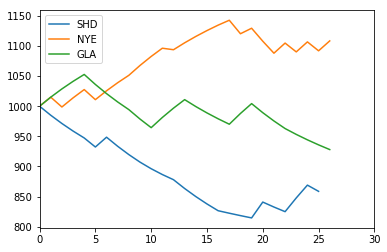

In [70]:
plt.plot(SHD_elo['map number'], SHD_elo['elo'], label='SHD')
plt.plot(NYE_elo['map number'], NYE_elo['elo'], label='NYE')
plt.plot(GLA_elo['map number'], GLA_elo['elo'], label='GLA')
plt.xlim([0,30])
plt.legend()
plt.show()